In [1]:
import geopandas as gpd
import pandas as pd

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_GMT.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_GMT.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program

## Setting the CRS

In [2]:
regions = gpd.read_file("datasets/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

epsg:32630


In [3]:
# Create a DataFrame with health facilities in Ghana
facilities_df = pd.read_csv("datasets/ghana/ghana/health_facilities.csv")

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

c:\python38\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


In the code cell above, to create a GeoDataFrame from a CSV file, we needed to use both Pandas and GeoPandas:
- We begin by creating a DataFrame containing columns with latitude and longitude coordinates.
- To convert it to a GeoDataFrame, we use `gpd.GeoDataFrame()`.  
- The `gpd.points_from_xy()` function creates `Point` objects from the latitude and longitude columns.

# Re-projecting

Re-projecting refers to the process of changing the CRS.  This is done in GeoPandas with the `to_crs()` method.

When plotting multiple GeoDataFrames, it's important that they all use the same CRS.  In the code cell below, we change the CRS of the `facilities` GeoDataFrame to match the CRS of `regions` before plotting it.

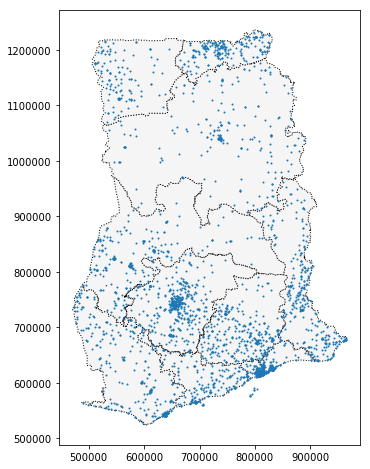

In [5]:
# Create a map
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In [6]:
# The "Latitude" and "Longitude" columns are unchanged
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


In [7]:
# change the CRS to EPSG 4326 using proj4string
regions.to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs').head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


In [8]:
# Get the x-coordinate of each point
facilities.geometry.x.head()

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

# Attributes of geometric objects

As you learned in the first tutorial, for an arbitrary GeoDataFrame, the type in the "geometry" column depends on what we are trying to show: for instance, we might use:
- a Point for the epicenter of an earthquake, 
- a LineString for a street, or 
- a Polygon to show country boundaries.

All three types of geometric objects have built-in attributes that you can use to quickly analyze the dataset.  For instance, you can get the x- and y-coordinates of a Point from the `x` and `y` attributes, respectively.

And, you can get the length of a LineString from the `length` attribute.  

Or, you can get the area of a Polygon from the `area` attribute.

In [9]:
# Calculate the area (in square meters) of each polygon in the GeoDataFrame 
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: epsg:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145
